In [2]:
from langgraph.graph import StateGraph, START,END 
from  typing import TypedDict 
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

In [4]:
load_dotenv() 
llm = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)

In [5]:
class JokeState(TypedDict):
    topic : str 
    joke : str 
    explanation : str 

persistance  get_state 

In [6]:
def generate_joke(state : JokeState):
    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content
    return {'joke': response}

In [7]:
def generate_explanation(state : JokeState):
    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content
    return {'explanation': response}

In [8]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)
checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer = checkpointer )

In [9]:
config1 = {"configurable" : {"thread_id" : "1"}}
workflow.invoke({'topic': 'code'}, config = config1)

{'topic': 'code',
 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.',
 'explanation': 'This joke is a play on words, combining a common issue in programming with a literal interpretation of the phrase "bugs." \n\nIn programming, a "bug" refers to an error or a glitch in the code that causes it to malfunction. Programmers often spend a significant amount of time debugging their code, which involves identifying and fixing these errors.\n\nThe joke takes this concept and applies it to the physical world, suggesting that light attracts literal bugs, such as insects. This is a clever pun, as it uses the dual meaning of the word "bugs" to create a humorous connection between the programming concept and the physical world.\n\nIn essence, the joke is saying that programmers prefer dark mode because it reduces the number of literal bugs (insects) that might be attracted to the light, much like how they prefer to minimize the number of errors (bugs) in their code.'}

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'code', 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.', 'explanation': 'This joke is a play on words, combining a common issue in programming with a literal interpretation of the phrase "bugs." \n\nIn programming, a "bug" refers to an error or a glitch in the code that causes it to malfunction. Programmers often spend a significant amount of time debugging their code, which involves identifying and fixing these errors.\n\nThe joke takes this concept and applies it to the physical world, suggesting that light attracts literal bugs, such as insects. This is a clever pun, as it uses the dual meaning of the word "bugs" to create a humorous connection between the programming concept and the physical world.\n\nIn essence, the joke is saying that programmers prefer dark mode because it reduces the number of literal bugs (insects) that might be attracted to the light, much like how they prefer to minimize the number of errors (bug

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'code', 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.', 'explanation': 'This joke is a play on words, combining a common issue in programming with a literal interpretation of the phrase "bugs." \n\nIn programming, a "bug" refers to an error or a glitch in the code that causes it to malfunction. Programmers often spend a significant amount of time debugging their code, which involves identifying and fixing these errors.\n\nThe joke takes this concept and applies it to the physical world, suggesting that light attracts literal bugs, such as insects. This is a clever pun, as it uses the dual meaning of the word "bugs" to create a humorous connection between the programming concept and the physical world.\n\nIn essence, the joke is saying that programmers prefer dark mode because it reduces the number of literal bugs (insects) that might be attracted to the light, much like how they prefer to minimize the number of errors (bu

In [12]:
config2 = {"configurable": {"thread_id": 2}}
workflow.invoke({'topic': 'money'}, config = config2)



{'topic': 'money',
 'joke': 'Why did the dollar bill go to the doctor? \n\nBecause it was feeling a little flat.',
 'explanation': 'The joke relies on a play on words. The phrase "feeling a little flat" has a double meaning here. \n\nIn one sense, a dollar bill is literally a flat piece of paper. So, when it says the dollar bill is "feeling a little flat," it\'s making a pun on the physical appearance of the bill.\n\nHowever, the phrase "feeling a little flat" can also be interpreted as feeling unwell or not feeling one\'s best, which is a common reason for visiting a doctor. \n\nThe joke combines these two meanings to create a pun, where the dollar bill\'s physical flatness is used to describe its emotional state, creating a humorous connection between the setup and the punchline.'}

In [13]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'code', 'joke': 'Why do programmers prefer dark mode? \n\nBecause light attracts bugs.', 'explanation': 'This joke is a play on words, combining a common issue in programming with a literal interpretation of the phrase "bugs." \n\nIn programming, a "bug" refers to an error or a glitch in the code that causes it to malfunction. Programmers often spend a significant amount of time debugging their code, which involves identifying and fixing these errors.\n\nThe joke takes this concept and applies it to the physical world, suggesting that light attracts literal bugs, such as insects. This is a clever pun, as it uses the dual meaning of the word "bugs" to create a humorous connection between the programming concept and the physical world.\n\nIn essence, the joke is saying that programmers prefer dark mode because it reduces the number of literal bugs (insects) that might be attracted to the light, much like how they prefer to minimize the number of errors (bug

In [15]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'money', 'joke': 'Why did the dollar bill go to the doctor? \n\nBecause it was feeling a little flat.', 'explanation': 'The joke relies on a play on words. The phrase "feeling a little flat" has a double meaning here. \n\nIn one sense, a dollar bill is literally a flat piece of paper. So, when it says the dollar bill is "feeling a little flat," it\'s making a pun on the physical appearance of the bill.\n\nHowever, the phrase "feeling a little flat" can also be interpreted as feeling unwell or not feeling one\'s best, which is a common reason for visiting a doctor. \n\nThe joke combines these two meanings to create a pun, where the dollar bill\'s physical flatness is used to describe its emotional state, creating a humorous connection between the setup and the punchline.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07379a-b359-6be4-8002-7dab63feebab'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}

Time Travel 


In [16]:
workflow.get_state({"configurable": {"thread_id": 2,"checkpoint_id":"1f07379a-6c2a-6e64-8000-1f1675deb896" }})

StateSnapshot(values={'topic': 'money'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f07379a-6c2a-6e64-8000-1f1675deb896'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-07T10:31:17.449882+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07379a-6c28-6a28-bfff-de48cc282146'}}, tasks=(PregelTask(id='4e5d5cc5-27a6-8515-56fa-7e88ad452c25', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the dollar bill go to the doctor? \n\nBecause it was feeling a little flat.'}),), interrupts=())

In [17]:
workflow.invoke(None , {"configurable": {"thread_id": 2,"checkpoint_id":"1f07379a-6c2a-6e64-8000-1f1675deb896" }})

{'topic': 'money',
 'joke': 'Why did the dollar bill go to the doctor? \n\nBecause it was feeling a little flat.',
 'explanation': 'The joke relies on a play on words. The phrase "feeling a little flat" has a double meaning here. \n\nIn one sense, a dollar bill is literally a flat piece of paper. So, when it says the dollar bill is "feeling a little flat," it\'s making a pun on the physical appearance of the bill.\n\nHowever, the phrase "feeling a little flat" can also be interpreted as feeling unwell or not feeling one\'s best, which is a common reason for visiting a doctor. \n\nThe joke combines these two meanings to create a pun, where the dollar bill\'s physical flatness is used to describe its emotional state, creating a humorous connection between the setup and the punchline.'}

Updating State 


In [18]:
workflow.update_state({"configurable": {"thread_id": 2,"checkpoint_id":"1f07379a-6c2a-6e64-8000-1f1675deb896" ,"checkpoint_ns": ""}},{'topic':'samosa'})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0737b0-40f9-6b90-8001-5bedfe435e84'}}

In [21]:
workflow.invoke(None , {"configurable": {"thread_id": 2,"checkpoint_id":"1f0737b0-40f9-6b90-8001-5bedfe435e84" }})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of filling issues.',
 'explanation': 'This joke is a play on words, combining a pun with a common phrase associated with mental health. \n\nThe phrase "feeling crumby" is a common idiomatic expression meaning to feel unwell or unhappy. However, in this joke, it\'s also a reference to the fact that a samosa is a type of pastry that is typically crumbly in texture.\n\nThe second part of the joke, "had a lot of filling issues," is another play on words. In this context, "filling issues" has a double meaning. It can refer to emotional or psychological issues that someone might experience, but it also references the fact that a samosa is typically filled with a variety of ingredients, such as spiced potatoes, peas, and onions.\n\nThe joke relies on the listener being familiar with the concept of therapy and the idea that people can have emotional or psychological issues. It also r

Fault Tolerance 

In [22]:
class CrashState(TypedDict):
    input :str 
    step1 : str 
    step2 : str 

In [23]:
import time
def step_1(state : CrashState) -> CrashState:
    print(" Step 1 executed")
    return {"step1":"done" ,"input": state["input"]}

def step_2(state : CrashState) -> CrashState:
    print(" step 2 hanginh ... now manually interrupt from the notebook toolbat")
    time.sleep(1000)
    
def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [24]:
builder = StateGraph(CrashState)
builder.add_node("step_1" , step_1)
builder.add_node("step_2" , step_2)
builder.add_node("step_3" , step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1","step_2")
builder.add_edge("step_2","step_3")
builder.add_edge("step_3",END)

workflow = builder.compile(checkpointer = checkpointer )

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    workflow.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

In [ ]:
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)

In [5]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv() 
llm = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)
messages = [
    ("system" , "You are a helpful assistant"),
    ("human" , "I Love cuddling")
]
llm.invoke(messages)

AIMessage(content="That's so sweet! Cuddling is a great way to show affection and can be very comforting. It's a universal language that can bring people together and create a sense of closeness.\n\nWhat's your favorite thing about cuddling? Is it the physical touch, the emotional connection, or something else entirely?\n\nDo you have a favorite cuddling spot or a favorite person to cuddle with?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 44, 'total_tokens': 125, 'completion_time': 0.111585204, 'prompt_time': 0.009497582, 'queue_time': 6.58479426, 'total_time': 0.121082786}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1b7bf8eb-f03e-4fde-a3bb-f77fd5d1b959-0', usage_metadata={'input_tokens': 44, 'output_tokens': 81, 'total_tokens': 125})

Stream



In [6]:
for chunk in llm.stream(messages):
    print(chunk.text(), end= "")

That's so sweet! Cuddling is a great way to show affection and can be very comforting. It's a universal language that can bring people together and create a sense of closeness.

What's your favorite thing about cuddling? Is it the physical touch, the emotional connection, or something else entirely?

Do you have a favorite cuddling spot or a favorite person to cuddle with?

In [7]:
stream = llm.stream(messages)
full = next(stream)
for chunk in stream:
    full += chunk
full

AIMessageChunk(content="That's so sweet! Cuddling is a great way to show affection and can be very comforting. It's a universal language that can bring people together and create a sense of closeness.\n\nWhat's your favorite thing about cuddling? Is it the physical touch, the emotional connection, or something else entirely?\n\nDo you have a favorite cuddling spot or a favorite person to cuddle with?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand'}, id='run--e320e221-23a4-4407-b3e8-97c1686ff47f', usage_metadata={'input_tokens': 44, 'output_tokens': 81, 'total_tokens': 125})

In [8]:
await llm.ainvoke(messages)

AIMessage(content="That's so sweet! Cuddling is a great way to show affection and can be very comforting. It's a universal language that can bring people together and create a sense of closeness.\n\nWhat's your favorite thing about cuddling? Is it the physical touch, the emotional connection, or something else entirely?\n\nDo you have a favorite cuddling spot or a favorite person to cuddle with?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 44, 'total_tokens': 125, 'completion_time': 0.109812685, 'prompt_time': 0.009297306, 'queue_time': 5.691686533, 'total_time': 0.119109991}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--87c06927-f80a-4cdf-a02c-d8a19752003a-0', usage_metadata={'input_tokens': 44, 'output_tokens': 81, 'total_tokens': 125})

tool calling 

In [9]:
from pydantic import BaseModel, Field  

class GetWeather(BaseModel):
    '''Get the current weather in a given location'''

    location: str = Field(..., description="The city and state, e.g. San Francisco, CA")

class GetPopulation(BaseModel):
    '''Get the current population in a given location'''

    location: str = Field(..., description="The city and state, e.g. San Francisco, CA")
    
model_with_tools =llm.bind_tools([GetWeather, GetPopulation])
ai_msg = model_with_tools.invoke("What is the population of NY?")
ai_msg.tool_calls

[{'name': 'GetPopulation',
  'args': {'location': 'New York, NY'},
  'id': 'kggn1ksmv',
  'type': 'tool_call'}]

In [10]:
from typing import TypedDict
from pydantic import BaseModel, Field  

class Joke(BaseModel):
    '''Joke to tell user '''
    setup :  str = Field(description = "The setup of the joke ")
    punchline: str = Field(description = "The punchline to the joke")
    rating : int = Field(description = "How funny the joke is, from 1 to 10"
                         )
structured_model = llm.with_structured_output(Joke)
structured_model.invoke("Tell me a joke about cats")

Joke(setup='Why did the cat join a band?', punchline='Because it wanted to be the purr-cussionist!', rating=8)

In [11]:
ai_msg = llm.invoke(messages)
ai_msg.response_metadata

{'token_usage': {'completion_tokens': 81,
  'prompt_tokens': 44,
  'total_tokens': 125,
  'completion_time': 0.108554769,
  'prompt_time': 0.027458176,
  'queue_time': 0.165847196,
  'total_time': 0.136012945},
 'model_name': 'llama-3.1-8b-instant',
 'system_fingerprint': 'fp_510c177af0',
 'service_tier': 'on_demand',
 'finish_reason': 'stop',
 'logprobs': None}

In [13]:
from langgraph.graph import StateGraph, START,END 
from typing import TypedDict , Annotated 
from langchain_core.messages import BaseMessage , HumanMessage , AIMessage
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv() 

True

In [14]:
from langgraph.graph.message import add_messages 

class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage],add_messages]

In [15]:
llm = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)

def chat_node(state : ChatState):
    messages = state['messages']
    response = llm.invoke(messages)
    
    return{'messages': [response]}

In [16]:
graph = StateGraph(ChatState)
graph.add_node('chat_node',chat_node)
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile()

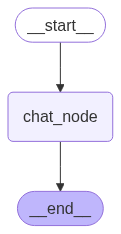

In [17]:
chatbot 

In [ ]:
initial_state = {
    'messages' : [HumanMessage(content = "what is capital of france ?")]
    }

chatbot.invoke(initial_state)['messages'][-1].content 

'The capital of France is Paris.'

In [40]:
from langgraph.graph import StateGraph, START,END 
from typing import TypedDict , Annotated 
from langchain_core.messages import SystemMessage , HumanMessage , AIMessage
from langchain_groq import ChatGroq
import operator 

In [38]:
generator_llm = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)
evaluator_llm = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)
optimizer_llm = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)

In [41]:
from pydantic import BaseModel , Field 
from typing import Literal 
class TweetEvaluation(BaseModel):
    evaluation : Literal["approved" , "needs_improvemnet"] = Field(..., description="Final evaluation result.")
    feedback: str = Field(..., description="feedback for the tweet.")

In [42]:
structured_evaluator_llm = evaluator_llm.with_structured_output(TweetEvaluation)

In [43]:
class TweetState(TypedDict):
    topic : str 
    tweet : str 
    evaluation : Literal["approved" , "needs_improvemnet"]
    feedback : str 
    iteration : int 
    
    max_iteration : int 
    
    tweet_history : Annotated[list[str], operator.add]
    feedback_history : Annotated[list[str], operator.add]

In [44]:
def generate_tweet(state : TweetState):
    messages = [
        SystemMessage(content="You are a funny and clever Twitter/X influencer."),
        HumanMessage(content=f"""Write a short, original, and hilarious tweet on the topic: "{state['topic']}".""")
    ]
    response = generator_llm.invoke(messages).content
    return {'tweet': response , 'tweet_history':[response]}

In [45]:
def evaluate_tweet(state : TweetState):
    messages = [
        SystemMessage(content= " You are a ruthless, no-laugh-given Twitter critic. You evaluate tweets based on humor, originality, virality, and tweet format."),
        HumanMessage(content=f"""
Evaluate the following tweet:

Tweet: "{state['tweet']}"

Use the criteria below to evaluate the tweet:

1. Originality – Is this fresh, or have you seen it a hundred times before?  
2. Humor – Did it genuinely make you smile, laugh, or chuckle?  
3. Punchiness – Is it short, sharp, and scroll-stopping?  
4. Virality Potential – Would people retweet or share it?  
5. Format – Is it a well-formed tweet (not a setup-punchline joke, not a Q&A joke, and under 280 characters)?

Auto-reject if:
- It's written in question-answer format (e.g., "Why did..." or "What happens when...")
- It exceeds 280 characters
- It reads like a traditional setup-punchline joke
- Dont end with generic, throwaway, or deflating lines that weaken the humor (e.g., “Masterpieces of the auntie-uncle universe” or vague summaries)

### Respond ONLY in structured format:
- evaluation: "approved" or "needs_improvement"  
- feedback: One paragraph explaining the strengths and weaknesses 
""")
        ]
    
    try:
        response = structured_evaluator_llm.invoke(messages)
        
        # Check if response is None or doesn't have expected attributes
        if response is None:
            print("Warning: LLM returned None response, using fallback")
            return {
                'evaluation': 'needs_improvement', 
                'feedback': 'LLM failed to generate evaluation. Please try again.',
                'feedback_history': ['LLM failed to generate evaluation. Please try again.']
            }
        
        return {'evaluation':response.evaluation, 'feedback': response.feedback, 'feedback_history': [response.feedback]}
        
    except Exception as e:
        print(f"Error in evaluate_tweet: {e}")
        return {
            'evaluation': 'needs_improvement', 
            'feedback': f'Error during evaluation: {str(e)}',
            'feedback_history': [f'Error during evaluation: {str(e)}']
        }
    

In [46]:
def optimize_tweet(state : TweetState):
    messages = [
        SystemMessage(content="You punch up tweets for virality and humor based on given feedback."),
        HumanMessage(content=f"""
                    Imporve the tweet based on this feedback:
                    "{state['feedback']}"
                    
                    Topic: "{state['topic']}"
                    Original Tweet:
                    {state['tweet']}
                    """)
        
    ]
    response = optimizer_llm.invoke(messages).content
    return{'tweet' : response , 'iteration' : state['iteration']  , 'tweet_history' : [response]}

In [47]:
def route_evaluation(state: TweetState):

    if state['evaluation'] == 'approved' or state['iteration'] >= state['max_iteration']:
        return 'approved'
    else:
        return 'needs_improvement'

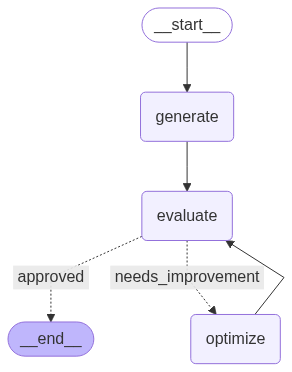

In [48]:
graph = StateGraph(TweetState)

graph.add_node('generate', generate_tweet)
graph.add_node('evaluate', evaluate_tweet)
graph.add_node('optimize', optimize_tweet)

graph.add_edge(START, 'generate')
graph.add_edge('generate', 'evaluate')

graph.add_conditional_edges('evaluate', route_evaluation, {'approved': END, 'needs_improvement': 'optimize'})
graph.add_edge('optimize', 'evaluate')

workflow = graph.compile()

workflow

In [49]:
initial_state = {
    'topic' : 'AI',
    'iteration' : 1,
    'max_iteration' : 5
}
result = workflow.invoke(initial_state)

In [50]:
result 

{'topic': 'AI',
 'tweet': '"Just asked my AI assistant to write a joke. It came up with: \'Why did the robot go on a diet? Because it wanted to lose some bytes.\' I\'m starting to think it\'s a byte-ful comedian #AI #RobotComedy"',
 'evaluation': 'approved',
 'feedback': "This tweet is well-crafted and effectively uses humor. The use of 'byte-ful comedian' is a clever play on words, and the AI assistant's joke is a fresh take on a common robot joke. However, the tweet could benefit from a stronger punchline, as the joke itself is somewhat predictable. Additionally, the inclusion of the hashtag #RobotComedy adds a touch of originality and helps the tweet stand out. Overall, the tweet is well-written, and with a few tweaks, it could be even more effective at generating laughs.",
 'iteration': 1,
 'max_iteration': 5,
 'tweet_history': ['"Just asked my AI assistant to write a joke. It came up with: \'Why did the robot go on a diet? Because it wanted to lose some bytes.\' I\'m starting to t

In [51]:
for tweet in result['tweet_history']:
    print(tweet)

"Just asked my AI assistant to write a joke. It came up with: 'Why did the robot go on a diet? Because it wanted to lose some bytes.' I'm starting to think it's a byte-ful comedian #AI #RobotComedy"


In [52]:
from langgraph.graph import StateGraph , START ,END 
from typing import TypedDict , Annotated , Literal 
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from pydantic import BaseModel , Field 

load_dotenv()

model = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)

In [53]:
class SentimentSchema(BaseModel):
    sentiment : Literal["positive" , "negative"] =Field(description = 'Sentiment of the review')
    

In [54]:
class DiagnosisSchema(BaseModel):
    issue_type: Literal["UX", "Performance", "Bug", "Support", "Other"] = Field(description='The category of issue mentioned in the review')
    tone: Literal["angry", "frustrated", "disappointed", "calm"] = Field(description='The emotional tone expressed by the user')
    urgency: Literal["low", "medium", "high"] = Field(description='How urgent or critical the issue appears to be')

In [55]:
structured_model = model.with_structured_output(SentimentSchema)
structured_model2 = model.with_structured_output(DiagnosisSchema)

In [57]:
prompt = 'What is the sentiment of the following review - The software is too good'
structured_model.invoke(prompt).sentiment 

'positive'

In [58]:
class ReviewState(TypedDict):
    review : str 
    sentiment : Literal["positive" , "negative"]
    diagnosis : dict 
    response : str 

In [61]:
def find_sentiment(state : ReviewState):
    prompt = f'For the following review find out the sentiment \n {state["review"]}'
    sentiment = structured_model.invoke(prompt).sentiment

    return {'sentiment': sentiment}

def check_sentiment(state : ReviewState) -> Literal["positive_response", "run_diagnosis"]:

    if state['sentiment'] == 'positive':
        return 'positive_response'
    else:
        return 'run_diagnosis'
    
def positive_response(state : ReviewState):
    prompt = f"""Write a warm thank-you message in response to this review:
    \n\n\"{state['review']}\"\n
    Also, kindly ask the user to leave feedback on our website."""
    
    response = model.invoke(prompt).content

    return {'response': response}

def run_diagnosis(state : ReviewState):
    prompt = f"""Diagnose this negative review:\n\n{state['review']}\n"
    "Return issue_type, tone, and urgency.
""" 

    response = structured_model2.invoke(prompt)
    
    return {'diagnosis': response.model_dump()}

def negative_response(state : ReviewState):
    diagnosis = state['diagnosis']
    
    prompt = f"""You are a support assistant.
    The user had a '{diagnosis['issue_type']}' issue, sounded '{diagnosis['tone']}', and marked urgency as '{diagnosis['urgency']}'.
    Write an empathetic, helpful resolution message.
    """
    response = model.invoke(prompt).content

    return {'response': response}

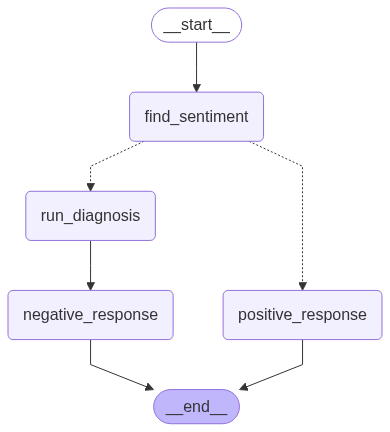

In [62]:
graph = StateGraph(ReviewState)

graph.add_node('find_sentiment', find_sentiment)
graph.add_node('positive_response', positive_response)
graph.add_node('run_diagnosis', run_diagnosis)
graph.add_node('negative_response', negative_response)

graph.add_edge(START, 'find_sentiment')

graph.add_conditional_edges('find_sentiment' , check_sentiment)
graph.add_edge('positive_response' , END)
graph.add_edge('run_diagnosis' , 'negative_response')
graph.add_edge('negative_response' , END)

workflow = graph.compile()
workflow

In [63]:
intial_state={
    'review': "I’ve been trying to log in for over an hour now, and the app keeps freezing on the authentication screen. I even tried reinstalling it, but no luck. This kind of bug is unacceptable, especially when it affects basic functionality."
}
workflow.invoke(intial_state)

{'review': 'I’ve been trying to log in for over an hour now, and the app keeps freezing on the authentication screen. I even tried reinstalling it, but no luck. This kind of bug is unacceptable, especially when it affects basic functionality.',
 'sentiment': 'negative',
 'diagnosis': {'issue_type': 'Bug', 'tone': 'angry', 'urgency': 'high'},
 'response': "Dear [User],\n\nI'm so sorry to hear that you're experiencing a 'Bug' issue with our system. I can imagine how frustrating that must be for you, and I want to assure you that I'm here to help resolve the problem as quickly as possible.\n\nI understand that you've marked this issue as 'High' urgency, and I want to assure you that I'll do everything in my power to address it promptly. Please know that I'm committed to providing you with a resolution that meets your needs.\n\nTo better assist you, could you please provide me with more details about the issue you're experiencing? This will help me to identify the root cause of the problem

In [68]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field
import operator

In [69]:
load_dotenv() 

True

In [70]:
model = ChatGroq(
    model = "llama-3.1-8b-instant",
    temperature = 0.0
)

In [77]:
class EvaluationSchema(BaseModel):

    feedback: str = Field(description='Detailed feedbackfor the essay')
    score: int = Field(description='Score out of 10', ge=0, le=10)

In [78]:
structured_model = model.with_structured_output(EvaluationSchema)

In [79]:
essay = """India in the Age of AI
As the world enters a transformative era defined by artificial intelligence (AI), India stands at a critical juncture — one where it can either emerge as a global leader in AI innovation or risk falling behind in the technology race. The age of AI brings with it immense promise as well as unprecedented challenges, and how India navigates this landscape will shape its socio-economic and geopolitical future.

India's strengths in the AI domain are rooted in its vast pool of skilled engineers, a thriving IT industry, and a growing startup ecosystem. With over 5 million STEM graduates annually and a burgeoning base of AI researchers, India possesses the intellectual capital required to build cutting-edge AI systems. Institutions like IITs, IIITs, and IISc have begun fostering AI research, while private players such as TCS, Infosys, and Wipro are integrating AI into their global services. In 2020, the government launched the National AI Strategy (AI for All) with a focus on inclusive growth, aiming to leverage AI in healthcare, agriculture, education, and smart mobility.

One of the most promising applications of AI in India lies in agriculture, where predictive analytics can guide farmers on optimal sowing times, weather forecasts, and pest control. In healthcare, AI-powered diagnostics can help address India’s doctor-patient ratio crisis, particularly in rural areas. Educational platforms are increasingly using AI to personalize learning paths, while smart governance tools are helping improve public service delivery and fraud detection.

However, the path to AI-led growth is riddled with challenges. Chief among them is the digital divide. While metropolitan cities may embrace AI-driven solutions, rural India continues to struggle with basic internet access and digital literacy. The risk of job displacement due to automation also looms large, especially for low-skilled workers. Without effective skilling and re-skilling programs, AI could exacerbate existing socio-economic inequalities.

Another pressing concern is data privacy and ethics. As AI systems rely heavily on vast datasets, ensuring that personal data is used transparently and responsibly becomes vital. India is still shaping its data protection laws, and in the absence of a strong regulatory framework, AI systems may risk misuse or bias.

To harness AI responsibly, India must adopt a multi-stakeholder approach involving the government, academia, industry, and civil society. Policies should promote open datasets, encourage responsible innovation, and ensure ethical AI practices. There is also a need for international collaboration, particularly with countries leading in AI research, to gain strategic advantage and ensure interoperability in global systems.

India’s demographic dividend, when paired with responsible AI adoption, can unlock massive economic growth, improve governance, and uplift marginalized communities. But this vision will only materialize if AI is seen not merely as a tool for automation, but as an enabler of human-centered development.

In conclusion, India in the age of AI is a story in the making — one of opportunity, responsibility, and transformation. The decisions we make today will not just determine India’s AI trajectory, but also its future as an inclusive, equitable, and innovation-driven society."""

In [80]:
prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {essay}'
structured_model.invoke(prompt).feedback

BadRequestError: Error code: 400 - {'error': {'message': "tool call validation failed: parameters for tool EvaluationSchema did not match schema: errors: [missing properties: 'score']", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<function=EvaluationSchema> {"feedback": "The essay provides a comprehensive analysis of India\'s position in the age of AI, highlighting both the opportunities and challenges. The writer effectively uses examples to illustrate the potential applications of AI in various sectors, such as agriculture, healthcare, and education. However, the essay could benefit from a more nuanced discussion of the digital divide and job displacement concerns. Additionally, the writer could have provided more concrete policy recommendations to address these issues. Overall, the essay demonstrates a good understanding of the topic and presents a clear argument. Score: 8/10"} </function>'}}

In [81]:
class UPSCState(TypedDict):
    essay : str 
    language_feedback: str 
    analysis_feedback: str 
    clarity_feedback: str 
    overall_feedback: str 
    individual_scores: Annotated[list[int], operator.add]
    avg_score: float 

In [82]:
def evaluate_language(state : UPSCState):
    prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    output = structured_model.invoke(prompt)
    return{'language_feedback':output.feedback, 'individual_scores':[output.score]}

In [83]:
def evaluate_analysis(state : UPSCState):
        prompt = f'Evaluate the analysis quality of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
        output = structured_model.invoke(prompt)
        return{'analysis_feedback':output.feedback, 'individual_scores':[output.score]}

In [84]:
def evaluate_thought(state : UPSCState):
    prompt = f'Evaluate the clarity of thought of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    output = structured_model.invoke(prompt)
    return{'clarity_feedback':output.feedback, 'individual_scores':[output.score]}

In [85]:
def final_evaluation(state: UPSCState):

    # summary feedback
    prompt = f'Based on the following feedbacks create a summarized feedback \n language feedback - {state["language_feedback"]} \n depth of analysis feedback - {state["analysis_feedback"]} \n clarity of thought feedback - {state["clarity_feedback"]}'
    overall_feedback = model.invoke(prompt).content

    # avg calculate
    avg_score = sum(state['individual_scores'])/len(state['individual_scores'])

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}

In [86]:
graph = StateGraph(UPSCState)

graph.add_node('evaluate_language', evaluate_language)
graph.add_node('evaluate_analysis', evaluate_analysis)
graph.add_node('evaluate_thought', evaluate_thought)
graph.add_node('final_evaluation', final_evaluation)

# edges
graph.add_edge(START, 'evaluate_language')
graph.add_edge(START, 'evaluate_analysis')
graph.add_edge(START, 'evaluate_thought')

graph.add_edge('evaluate_language', 'final_evaluation')
graph.add_edge('evaluate_analysis', 'final_evaluation')
graph.add_edge('evaluate_thought', 'final_evaluation')

graph.add_edge('final_evaluation', END)

workflow = graph.compile()

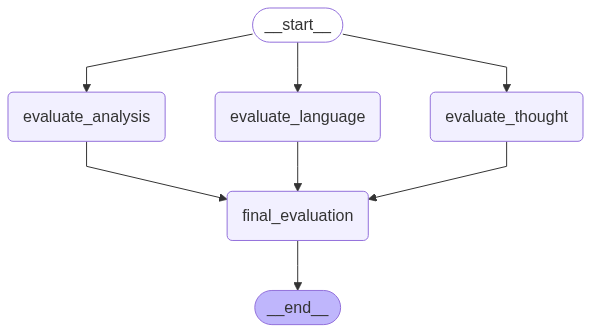

In [87]:
workflow


In [88]:
essay2 = """India and AI Time

Now world change very fast because new tech call Artificial Intel… something (AI). India also want become big in this AI thing. If work hard, India can go top. But if no careful, India go back.

India have many good. We have smart student, many engine-ear, and good IT peoples. Big company like TCS, Infosys, Wipro already use AI. Government also do program “AI for All”. It want AI in farm, doctor place, school and transport.

In farm, AI help farmer know when to put seed, when rain come, how stop bug. In health, AI help doctor see sick early. In school, AI help student learn good. Government office use AI to find bad people and work fast.

But problem come also. First is many villager no have phone or internet. So AI not help them. Second, many people lose job because AI and machine do work. Poor people get more bad.

One more big problem is privacy. AI need big big data. Who take care? India still make data rule. If no strong rule, AI do bad.

India must all people together – govern, school, company and normal people. We teach AI and make sure AI not bad. Also talk to other country and learn from them.

If India use AI good way, we become strong, help poor and make better life. But if only rich use AI, and poor no get, then big bad thing happen.

So, in short, AI time in India have many hope and many danger. We must go right road. AI must help all people, not only some. Then India grow big and world say "good job India"."""

In [ ]:
intial_state = {
    'essay': essay2
}

workflow.invoke(intial_state)